# SGD Algorithm to predict movie ratings

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. the data will be of this formate, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>
<h3>task 1: Predict the rating for a given (user_id, movie_id) pair</h3>
</pre>
<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>
then the predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as


$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

### TASK: 1
__SGD Algorithm to minimize the loss__
1. for each unique user initilize a bias value $B_{i}$ randomly, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user

2. for each unique movie initilize a bias value $C_{j}$ randomly, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie

3. Construct adjacency matrix with the given data, assumeing its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie
<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>
you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

4. we will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

5. So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

6. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie

7. $\mu$ represents the mean of all the rating given in the dataset
</pre>

<br>8.
<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
    predict the ratings with formula</pre>$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $
 <pre>
    print the mean squared error with predicted ratings
    </pre>

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>

10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 
### TASK: 2

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

In [1]:
import pandas as pd
import tqdm
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
data = pd.read_csv(r'D:\AI & ML\Assignments\15. Recommendation System And Truncated SVD SGD Algorithm To Predict Ratings\Files\ratings_train.csv')
data.shape

(89992, 3)

In [2]:

import numpy as np 
matrix = np.random.random((20, 10))
print(matrix.shape)
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 10)
(20, 5)
(5,)
(10, 5)


In [3]:
unique_item_size=data['item_id'].nunique()
unique_user_size=data['user_id'].nunique()
print("Number of Unique users are {0} and Number of Unique Movies are {1}".format(unique_user_size,unique_item_size))

Number of Unique users are 943 and Number of Unique Movies are 1662


In [4]:
Adjacency_matrix = csr_matrix((data['rating'].values, (data['user_id'].values, data['item_id'].values)))
Adjacency_matrix.shape

(943, 1681)

In [5]:
user_number=943
movie_number=1681

In [6]:
svd = TruncatedSVD(n_components=800, random_state=None)
U=svd.fit_transform(Adjacency_matrix)
Sigma=svd.singular_values_
VT = svd.components_
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)
#print(Sigma.shape)

(943, 800)
(800,)
(1681, 800)


In [7]:
scalar_mean_rating=(data['rating'].sum())/len(data['rating'])
print("Mean Rating Is: ",scalar_mean_rating)

Mean Rating Is:  3.529480398257623


Error at Epoch 0, is 0.30324363138012267
Error at Epoch 1, is 0.12561797811087166
Error at Epoch 2, is 0.06858720593408818
Error at Epoch 3, is 0.04298172149967484
Error at Epoch 4, is 0.029496882037545247
Error at Epoch 5, is 0.02164945411092454
Error at Epoch 6, is 0.016738041723988902
Error at Epoch 7, is 0.013480676857199817
Error at Epoch 8, is 0.011213331148777329
Error at Epoch 9, is 0.009569035695591512
Error at Epoch 10, is 0.008334196254806196
Error at Epoch 11, is 0.0073789020893006724
Error at Epoch 12, is 0.006621021063060688
Error at Epoch 13, is 0.006006788263368829
Error at Epoch 14, is 0.005499878783812055
Error at Epoch 15, is 0.005075035639755616
Error at Epoch 16, is 0.004714234211414129
Error at Epoch 17, is 0.004404305320059934
Error at Epoch 18, is 0.004135421869171963
Error at Epoch 19, is 0.003900110664817572
Error at Epoch 20, is 0.0036925917392372416
Error at Epoch 21, is 0.0035083267832201432
Error at Epoch 22, is 0.0033437040982873985
Error at Epoch 23, is 

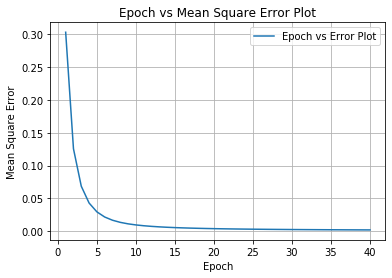

In [23]:
import matplotlib.pyplot as plt
Epoch=40
learning_rate=0.01
B_i=[0]*943
C_j=[0]*1681
MSE=[]
Epochs=list(range(1,Epoch+1))
for a in range(Epoch):
    for i,j,k in zip(data['user_id'],data['item_id'],data['rating']):
        B_i[i]=B_i[i]-learning_rate*((2*learning_rate*B_i[i])-(2*(k-scalar_mean_rating-B_i[i]-C_j[j]-np.dot(U[i],VT.T[j]))))
        C_j[j]=C_j[j]-learning_rate*((2*learning_rate*C_j[j]) - (2*(k-scalar_mean_rating-B_i[i]-C_j[j]-np.dot(U[i],VT.T[j]))))
    total_ratings=[]
    for i,j,k in zip(data['user_id'],data['item_id'],data['rating']):    
        predicted_rating=scalar_mean_rating+B_i[i]+C_j[j]+np.dot(U[i],VT.T[j])
        error_rating=k-predicted_rating
        total_ratings.append(error_rating**2)
    mean_error=sum(total_ratings)/len(data)    
    MSE.append(mean_error)
    print("Error at Epoch {0}, is {1}".format(a,mean_error))
plt.plot(Epochs,MSE,label="Epoch vs Error Plot")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Mean Square Error")
plt.title("Epoch vs Mean Square Error Plot")
plt.grid()
plt.show()

<h3>After 5th Epoch we got the elbow structure and after epoch 10 the loss is falling for slowly </h3>

# Observation
1. With the increase in number of components the MSE is becoming less at earlier stages.
2. With small number of components MSE is needs more number of Epoch to get lesser MSE.
3. So, it's trade off between Number of Components and Epoch. 
4. I tried many number of components and would came to conclusion that it's better to run more number of Epochs rather then going with higher number of components. As it's easier to run the loop whereas more memory will be needed incase of more number of components.


<h1>Task 2</h1>

In [24]:
column=["user_id", "age", "is_male", "actual_user_id"]
new_data = pd.read_csv(r'D:\AI & ML\Assignments\15. Recommendation System And Truncated SVD SGD Algorithm To Predict Ratings\Files\user_info.txt', sep=',', header=None, names=column, index_col=False)
new_data=new_data[1:]
new_data.head()

,user_id,age,is_male,actual_user_id
1,0,24,1,1
2,1,53,0,2
3,2,23,1,3
4,3,24,1,4
5,4,33,0,5


In [25]:
X=new_data[["user_id", "age", "actual_user_id"]]
Y=new_data["is_male"]
print("Train Size",X.shape)
print("Test Size",Y.shape)            

Train Size (943, 3)
Test Size (943,)


In [26]:
svd = TruncatedSVD(n_components=2, random_state=None)
U=svd.fit_transform(X)
Sigma=svd.singular_values_
VT = svd.components_
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
learning_rate=[0.001,0.1,1,10,100]
for i in learning_rate:
    classifier=LogisticRegression(C=1.0)
    classifier.fit(U,Y)
    print("Performance Of Confusion Matrix at learning rate {} is".format(i))
    print(confusion_matrix(Y,classifier.predict(U)))

Performance Of Confusion Matrix at learning rate 0.001 is
[[  0 273]
 [  0 670]]
Performance Of Confusion Matrix at learning rate 0.1 is
[[  0 273]
 [  0 670]]
Performance Of Confusion Matrix at learning rate 1 is
[[  0 273]
 [  0 670]]
Performance Of Confusion Matrix at learning rate 10 is
[[  0 273]
 [  0 670]]
Performance Of Confusion Matrix at learning rate 100 is
[[  0 273]
 [  0 670]]


In [27]:
svd = TruncatedSVD(n_components=1, random_state=None)
U=svd.fit_transform(X)
Sigma=svd.singular_values_
VT = svd.components_


from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
learning_rate=[0.001,0.1,1,10,100]
for i in learning_rate:
    classifier=LogisticRegression(C=1.0)
    classifier.fit(U,Y)
    print("Performance Of Confusion Matrix at learning rate {} is".format(i))
    print(confusion_matrix(Y,classifier.predict(U)))

Performance Of Confusion Matrix at learning rate 0.001 is
[[  0 273]
 [  0 670]]
Performance Of Confusion Matrix at learning rate 0.1 is
[[  0 273]
 [  0 670]]
Performance Of Confusion Matrix at learning rate 1 is
[[  0 273]
 [  0 670]]
Performance Of Confusion Matrix at learning rate 10 is
[[  0 273]
 [  0 670]]
Performance Of Confusion Matrix at learning rate 100 is
[[  0 273]
 [  0 670]]
